In [1]:
# ! unset http_proxy
# ! unset https_proxy

# from openie import StanfordOpenIE
# import os
# os.environ["CORENLP_HOME"] = '../stanford-corenlp/stanford-corenlp-full-2018-10-05'
# import stanza
# # Import client module
# from stanza.server import CoreNLPClient

# client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=['openie'], classpath='../stanford-corenlp/stanford-corenlp-full-2018-10-05/*')
# client.start()
# import time
# time.sleep(10)
# text = "Colm J. Neilson , of Belle Harbor , Queens , said he thought the conductors"
# document = client.annotate(text, output_format='json')
# triples = []
# for sentence in document['sentences']:
#     for triple in sentence['openie']:
#         triples.append({
#            'subject': triple['subject'],
#            'relation': triple['relation'],
#             'object': triple['object']
#         })
# print(triples)

/home/pj20/miniconda3/envs/kgc/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-10-22 19:24:28 INFO: Writing properties to tmp file: corenlp_server-88e5e1c3adf541b1.props
2022-10-22 19:24:28 INFO: Starting server with command: java -Xmx5G -cp ../stanford-corenlp/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-88e5e1c3adf541b1.props -annotators openie -preload -outputFormat serialized


In [1]:
from datasets import load_dataset

wiki_dataset = load_dataset("wikipedia", "20220301.en")

/home/pj20/miniconda3/envs/kgc/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Reusing dataset wikipedia (/home/pj20/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559)
100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.99it/s]


In [2]:
wiki_dataset = wiki_dataset['train']

In [7]:
type(wiki_dataset)

datasets.arrow_dataset.Dataset

In [13]:
wiki_dataset[0]['text'].split('.')[0] + '.'

'Anarchism is a political philosophy and movement that is sceptical of authority and rejects all involuntary, coercive forms of hierarchy.'

In [23]:
! ls ../../../data/pj20

Untitled.ipynb


In [24]:
from tqdm import tqdm

corpus_text = ""

for context in tqdm(wiki_dataset):
    split_text = context['text'].split('.')
    for t in split_text:
        line = t + '.\n'
        corpus_text = corpus_text + line
    
w_text = open("../../../data/pj20/corpus_text.txt", 'w', encoding='utf-8')
print(corpus_text, file=w_text)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6458670/6458670 [08:10<00:00, 13176.50it/s]


In [7]:
# The set of relation we're using
valid_relation_set = set()

rel_list = ['/people/person/nationality', '/location/location/contains', '/people/person/place_lived', 
            '/people/deceased_person/place_of_death', '/people/person/ethnicity', '/people/ethnicity/people',
            '/business/person/company', '/people/person/religion', '/location/neighborhood/neighborhood_of',
            '/business/company/founders', '/people/person/children', '/location/administrative_division/country',
            '/location/country/administrative_divisions', '/business/company/place_founded', '/location/us_county/county_seat']

for i in range(len(rel_list)):
    valid_relation_set.add(rel_list[i])
    
valid_relation_set

{'/business/company/founders',
 '/business/company/place_founded',
 '/business/person/company',
 '/location/administrative_division/country',
 '/location/country/administrative_divisions',
 '/location/location/contains',
 '/location/neighborhood/neighborhood_of',
 '/location/us_county/county_seat',
 '/people/deceased_person/place_of_death',
 '/people/ethnicity/people',
 '/people/person/children',
 '/people/person/ethnicity',
 '/people/person/nationality',
 '/people/person/place_lived',
 '/people/person/religion'}

In [23]:
original_triples_path = "./prompt_mining/triples_nyt10.txt"

random_selected_triples = ""
with open(original_triples_path) as f:
    original_triples = f.readlines()

count = 0
for idx in range(len(original_triples)):
    if '/people/deceased_person/place_of_death' in original_triples[idx]:
        count += 1
        if count % 10 == 0:
            random_selected_triples = random_selected_triples + original_triples[idx]

sp_path = "./prompt_mining/triples_nyt10_people_death.txt"
sp_file = open(sp_path, 'w', encoding='utf-8')
print(random_selected_triples, file=sp_file)

In [1]:
# ========= Read the processes Wiki corpus =============== #
corpus_path = "../../../data/pj20/corpus_text_low.txt"

with open(corpus_path) as f:
    corpus_lines = f.readlines()

In [24]:
triples_path = "./prompt_mining/triples_nyt10_people_death.txt"

mined_text = ""

with open(triples_path) as f:
    lines = f.readlines()
    
for line in lines:
    triple = line.split('\t')
    head, relation, tail = triple[0].replace('_', ' '), triple[1].split('/')[3].replace('_', ' '), triple[2][:-1].replace('_', ' ')
    print('=======================')
    print(head, relation, tail)
    print('=======================')
    for corpus_sentence in corpus_lines:
        if (head in corpus_sentence) and (tail in corpus_sentence):
#         and (relation in corpus_sentence) \
            mined_sentence = corpus_sentence.replace(head, '[X]').replace(tail, '[Y]')
#             print(mined_sentence)
            mined_text = mined_text + mined_sentence + '\n'
            
mined_text_file = open("./prompt_mining/mined_people_death.txt", 'w', encoding='utf-8')
print(mined_text, file=mined_text_file)

jawaharlal nehru place of death new delhi
roberto rossellini place of death rome
emmett till place of death tallahatchie river
christian brando place of death los angeles
pol pot place of death cambodia
anthony perkins place of death hollywood
stanley kunitz place of death manhattan
estée lauder place of death manhattan
casey sheehan place of death baghdad
jackie robinson place of death stamford
william blake place of death london
melvin belli place of death san francisco
imre nagy place of death budapest
gustav stickley place of death syracuse
astrid lindgren place of death stockholm
samuel beckett place of death paris
sergei eisenstein place of death moscow
patrick peyton place of death los angeles
berthe morisot place of death paris
tito puente place of death new york city
pope sixtus iv place of death rome
rod dedeaux place of death glendale
eva perón place of death buenos aires
john lautner place of death los angeles
nicole brown simpson place of death los angeles
peter stuyvesant

In [20]:
mined_text_file = open("./prompt_mining/mined_location_county.txt", 'w', encoding='utf-8')
print(mined_text, file=mined_text_file)

In [1]:
from itertools import chain
from nltk.corpus import wordnet

synonyms = wordnet.synsets('found')
lemmas = set(chain.from_iterable([word.lemma_names() for word in synonyms]))

[nltk_data] Downloading package webtext to /home/pj20/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


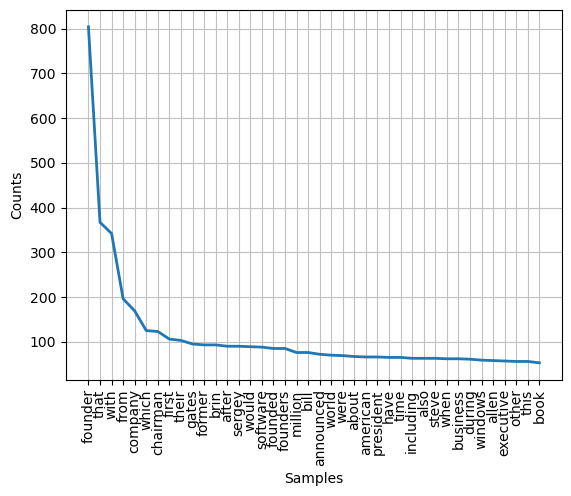

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [2]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
! cp ./prompt_mining/mined_text_founders.txt /home/pj20/nltk_data/corpora/webtext/mined_text_founders.txt
nltk.download('webtext')
wt_words = webtext.words("mined_text_founders.txt")
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
# for key in sorted(filter_words):
#     print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(40, cumulative=False)

[nltk_data] Downloading package webtext to /home/pj20/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


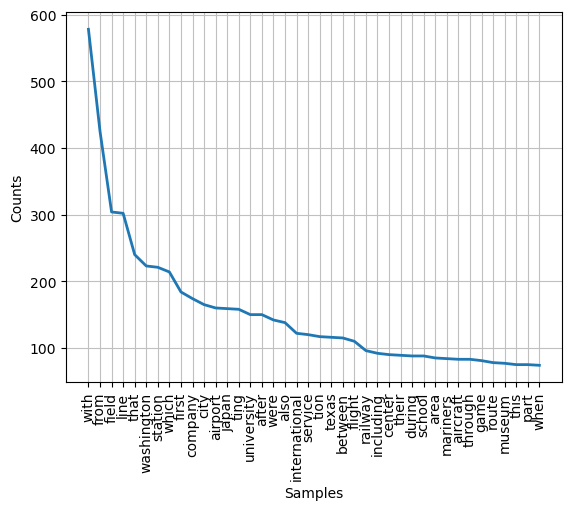

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
! cp ./prompt_mining/mined_text_place_founded.txt /home/pj20/nltk_data/corpora/webtext/mined_text_place_founded.txt
nltk.download('webtext')
wt_words = webtext.words("mined_text_place_founded.txt")
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(40, cumulative=False)

[nltk_data] Downloading package webtext to /home/pj20/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


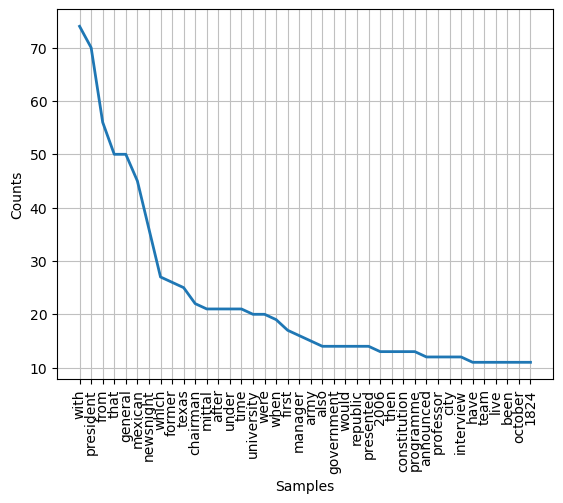

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
! cp ./prompt_mining/mined_text_company.txt /home/pj20/nltk_data/corpora/webtext/mined_text_company.txt
nltk.download('webtext')
wt_words = webtext.words("mined_text_company.txt")
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(40, cumulative=False)

[nltk_data] Downloading package webtext to /home/pj20/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


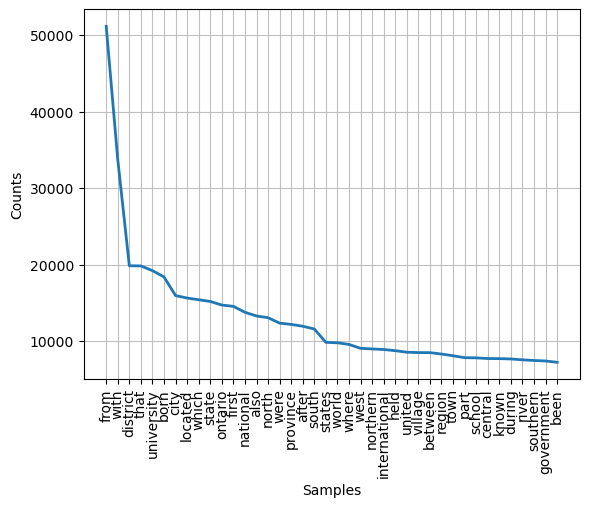

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
! cp ./prompt_mining/mined_administrative_division.txt /home/pj20/nltk_data/corpora/webtext/mined_administrative_division.txt
nltk.download('webtext')
wt_words = webtext.words("mined_administrative_division.txt")
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(40, cumulative=False)

[nltk_data] Downloading package webtext to /home/pj20/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


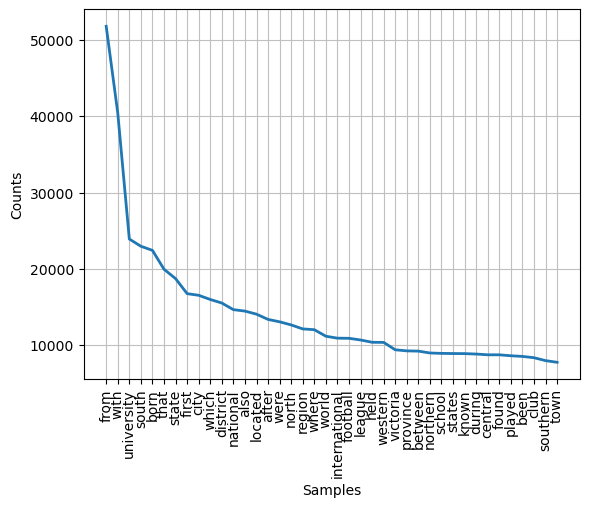

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
! cp ./prompt_mining/mined_administrative_division_2.txt /home/pj20/nltk_data/corpora/webtext/mined_administrative_division_2.txt
nltk.download('webtext')
wt_words = webtext.words("mined_administrative_division_2.txt")
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(40, cumulative=False)